In [1]:
# Libraries
import matplotlib
import warnings
import seaborn
import pandas
import numpy
import os

# Code
from src.data import converters   as data_converters
from src.data import inspection   as data_inspection
from src.data import loaders      as data_loaders
from src.data import manipulation as data_manipulation
from src.data import processing   as data_processing
from src.data import tsne         as data_tsne

# 1. Setup

## 1.1 Constants

In [2]:
ROOT = os.getcwd()
DATA = os.path.join(ROOT, 'res')

DATA_MODEL = os.path.join(DATA, 'model')
DATA_PLANT = os.path.join(DATA, 'plant')

print(f'Root directory : {ROOT}')
print(f'Data directory : {DATA}')

Root directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna
Data directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna\res


In [3]:
numpy.set_printoptions(suppress = True, formatter = {'float_kind' : '{:10.3f}'.format})
pandas.set_option('display.float_format', lambda x : '%10.3f' % x)

## 1.2 Data Loading

In [4]:
data = data_loaders.load_plant(name = 'arabidopsis', root = DATA_PLANT)

gene_annotation = data['gene_annotation']
gene_assembly   = data['gene_assembly']
tissue_metadata = data['tissue_metadata']
tissue_tpm      = data['tissue_tpm']

Loaded .gff3 data : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna\res\plant\arabidopsis\gene-annotation.gff3
Loaded .fa   data : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna\res\plant\arabidopsis\gene-assembly.fa
Loaded .tsv  data : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna\res\plant\arabidopsis\tissue-metadata.tsv
Loaded .tsv  data : C:\Developer\Workspace\PyCharm\Projects\upolanc-dna\res\plant\arabidopsis\tissue-tpm.tsv



### 1.2.1 Gene Annotation

In [5]:
gene_annotation = gene_annotation.drop(columns = [
	'Alias',
	'biotype',
	'constitutive',
	'description',
	'ensembl_end_phase',
	'ensembl_phase',
	'exon_id',
	'gene_id',
	'ID',
	'Is_circular',
	'logic_name',
	'Name',
	'protein_id',
	'Phase',
	'rank',
	'Score',
	'transcript_id'
])

gene_annotation = gene_annotation.rename(columns = {
	'Seqid' : 'SeqID'
})

gene_annotation = gene_annotation.astype({
	'Start' : int,
	'End' : int
})

gene_annotation.insert(5, 'Length', gene_annotation['End'] - gene_annotation['Start'])
gene_annotation.head()

,SeqID,Source,Type,Start,End,Length,Strand,Parent
0,1,TAIR,chromosome,1,30427671,30427670,NaN,NaN
1,1,araport11,gene,3631,5899,2268,+,NaN
2,1,araport11,mRNA,3631,5899,2268,+,gene:AT1G01010
3,1,araport11,five_prime_UTR,3631,3759,128,+,transcript:AT1G01010.1
4,1,araport11,exon,3631,3913,282,+,transcript:AT1G01010.1


### 1.2.2 Tissue Metadata

In [6]:
tissue_metadata = tissue_metadata.drop(columns = [
	'age',
	'BioProject',
	'BioSample',
	'comments',
	'complete_time',
	'experimental_design',
	'GEO_series',
	'Library_name',
	'perturbation_experiment',
	'perturbation_group_1',
	'perturbation_group_1_1',
	'perturbation_group_2_1',
	'perturbation_group_2_2',
	'perturbation_group_2_3',
	'priority',
	'project_description',
	'project_title',
	'QC_summary',
	'species_strain',
	'summary_Bioporoject_QC',
	'time_course',
	'time_series',
	'tissue',
	'Unnamed: 32'
])

tissue_metadata = tissue_metadata.rename(columns = {
	'age_group' : 'Age',
	'checked' : 'Checked',
	'control' : 'Control',
	'keep' : 'Keep',
	'perturbation_group' : 'Perturbation',
	'senescence samples' : 'Senescence',
	'SRAStudy' : 'Study',
	'SRR_accession' : 'SRR',
	'SRX_accession' : 'SRX',
	'tissue_group' : 'Tissue',
	'tissue_super' : 'Group'
})

tissue_metadata.head()

,SRR,SRX,Study,Sample,Senescence,Tissue,Checked,Control,Keep,Age,Perturbation,Group
0,DRR273449,DRX263033,DRP006986,DRS173125,NaN,seedling,True,yes,True,mature,control,mature_seedling
1,DRR273450,DRX263034,DRP006986,DRS173126,NaN,seedling,True,yes,True,mature,control,mature_seedling
2,DRR273451,DRX263035,DRP006986,DRS173127,NaN,seedling,True,yes,True,mature,control,mature_seedling
3,DRR273452,DRX263036,DRP006986,DRS173128,NaN,seedling,True,no,True,mature,environmental stress,mature_seedling
4,DRR273453,DRX263037,DRP006986,DRS173129,NaN,seedling,True,no,True,mature,environmental stress,mature_seedling


### 1.2.3 Tissue TPM

In [7]:
tissue_tpm = tissue_tpm.rename(columns = {
	'gene_id' : 'GeneID'
})

tissue_tpm.columns = [x.split('_')[0] for x in tissue_tpm.columns.tolist()]

tissue_tpm.iloc[:, :10].head()

,GeneID,DRR090011,DRR090012,DRR090013,DRR090014,DRR090015,DRR090016,DRR090017,DRR090018,DRR090019
0,AT1G01010.1,17.954,19.723,30.892,25.349,29.913,17.373,25.465,32.010,33.053
1,AT1G01020.1,2.140,0.000,0.502,1.455,2.084,0.000,1.565,0.626,0.061
2,AT1G01020.2,11.185,8.385,10.543,12.320,9.219,8.170,8.460,9.685,10.080
3,AT1G01020.3,0.000,0.000,2.558,0.000,0.006,2.017,1.933,0.000,0.000
4,AT1G01020.4,3.149,3.576,0.000,1.396,0.574,1.419,1.615,2.902,2.887


# 2. Analysis

## 2.1 Gene Annotation

In [8]:
print(f'Dataframe of shape : {" x ".join(str(x) for x in gene_annotation.shape)}')
print()

gene_annotation.head()

Dataframe of shape : 791564 x 8



,SeqID,Source,Type,Start,End,Length,Strand,Parent
0,1,TAIR,chromosome,1,30427671,30427670,NaN,NaN
1,1,araport11,gene,3631,5899,2268,+,NaN
2,1,araport11,mRNA,3631,5899,2268,+,gene:AT1G01010
3,1,araport11,five_prime_UTR,3631,3759,128,+,transcript:AT1G01010.1
4,1,araport11,exon,3631,3913,282,+,transcript:AT1G01010.1


### 2.1.1 Inspect

In [9]:
print(f'Dataframe contains [{gene_annotation.isna().sum().sum()}] null values')

Dataframe contains [32847] null values


In [10]:
data_inspection.inspect_column_values(dataframe = gene_annotation, columns = None)

,SeqID,Source,Type,Start,End,Length,Strand,Parent
Datatype,object,object,object,int32,int32,int32,object,object
Null,0,0,0,0,0,0,7,32840
Unique,7,2,17,227535,227537,7311,2,86846


### 2.1.2 Region 5'UTR

In [11]:
selection_5utr = gene_annotation.loc[gene_annotation['Type'] == 'five_prime_UTR']

print(f'Dataframe of shape : {" x ".join(str(x) for x in selection_5utr.shape)}')
print()

print(f'SeqID count :')
print(selection_5utr['SeqID'].value_counts(dropna = False).to_string())
print()

print(f'Strand count :')
print(selection_5utr['Strand'].value_counts(dropna = False).to_string())
print()

selection_5utr.head()

Dataframe of shape : 56384 x 8

SeqID count :
1     14888
5     12839
3     11100
2      8981
4      8572
Mt        4

Strand count :
+    28319
-    28065



,SeqID,Source,Type,Start,End,Length,Strand,Parent
3,1,araport11,five_prime_UTR,3631,3759,128,+,transcript:AT1G01010.1
30,1,araport11,five_prime_UTR,8420,8464,44,-,transcript:AT1G01020.6
32,1,araport11,five_prime_UTR,8594,8737,143,-,transcript:AT1G01020.6
51,1,araport11,five_prime_UTR,8667,8737,70,-,transcript:AT1G01020.2
68,1,araport11,five_prime_UTR,8443,8464,21,-,transcript:AT1G01020.3


### 2.1.3 Region CDS

In [12]:
selection_cds = gene_annotation.loc[gene_annotation['Type'] == 'CDS']

print(f'Dataframe of shape : {" x ".join(str(x) for x in selection_cds.shape)}')
print()

print(f'SeqID count :')
print(selection_cds['SeqID'].value_counts(dropna = False).to_string())
print()

print(f'Strand count :')
print(selection_cds['Strand'].value_counts(dropna = False).to_string())
print()

selection_cds.head()

Dataframe of shape : 286067 x 8

SeqID count :
1     77519
5     65591
3     54853
4     44061
2     43804
Mt      135
Pt      104

Strand count :
-    143701
+    142366



,SeqID,Source,Type,Start,End,Length,Strand,Parent
5,1,araport11,CDS,3760,3913,153,+,transcript:AT1G01010.1
7,1,araport11,CDS,3996,4276,280,+,transcript:AT1G01010.1
9,1,araport11,CDS,4486,4605,119,+,transcript:AT1G01010.1
11,1,araport11,CDS,4706,5095,389,+,transcript:AT1G01010.1
13,1,araport11,CDS,5174,5326,152,+,transcript:AT1G01010.1


### 2.1.4 Region 3'UTR

In [13]:
selection_3utr = gene_annotation.loc[gene_annotation['Type'] == 'three_prime_UTR']

print(f'Dataframe of shape : {" x ".join(str(x) for x in selection_3utr.shape)}')
print()

print(f'SeqID count :')
print(selection_3utr['SeqID'].value_counts(dropna = False).to_string())
print()

print(f'Strand count :')
print(selection_3utr['Strand'].value_counts(dropna = False).to_string())
print()

selection_3utr.head()

Dataframe of shape : 48308 x 8

SeqID count :
1    12711
5    11015
3     9429
2     7588
4     7565

Strand count :
+    24286
-    24022



,SeqID,Source,Type,Start,End,Length,Strand,Parent
16,1,araport11,three_prime_UTR,5631,5899,268,+,transcript:AT1G01010.1
20,1,araport11,three_prime_UTR,6788,7069,281,-,transcript:AT1G01020.6
21,1,araport11,three_prime_UTR,7157,7314,157,-,transcript:AT1G01020.6
35,1,araport11,three_prime_UTR,6788,7069,281,-,transcript:AT1G01020.2
36,1,araport11,three_prime_UTR,7157,7314,157,-,transcript:AT1G01020.2


### 2.1.5 Region Lengths

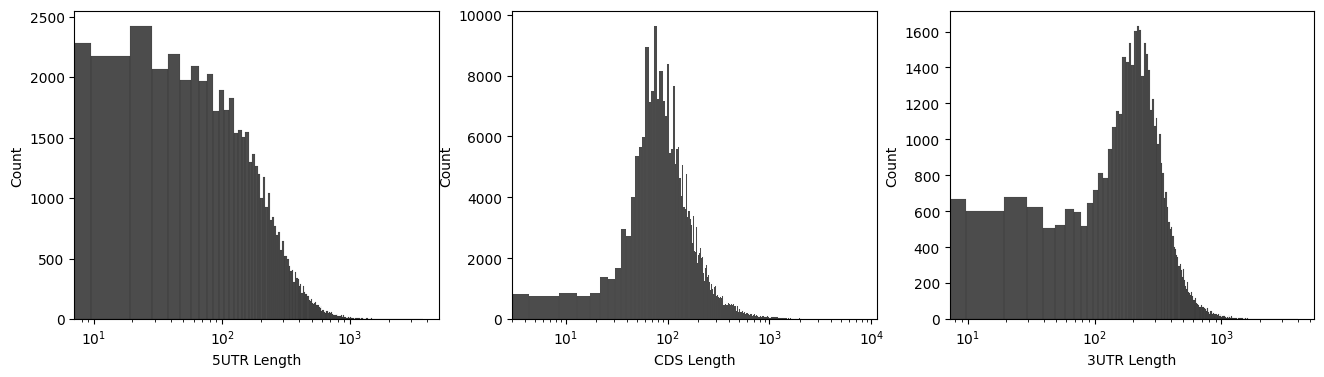

In [14]:
figure, ax = matplotlib.pyplot.subplots(1, 3, figsize = (16, 4))

region = ['5UTR', 'CDS', '3UTR']
dframe = [selection_5utr, selection_cds, selection_3utr]

for index, (name, data) in enumerate(zip(region, dframe)) :
	seaborn.histplot(
		x     = 'Length',
		data  = data,
		ax    = ax[index],
		color = 'k',
		alpha = 0.7,
		kde   = False
	)

	ax[index].set_xscale('log')
	ax[index].set_xlabel(f'{name} Length')

matplotlib.pyplot.show()

In [15]:
report = pandas.DataFrame(
	data = numpy.zeros((5, len(region)), dtype = float),
	columns = region,
	index = ['Min', 'Max', 'Mean', 'Median', 'Q-90']
)

for name, data in zip(region, dframe) :
	report[name] = [
		data["Length"].min(),
		data["Length"].max(),
		data["Length"].mean(),
		data["Length"].median(),
		data["Length"].quantile(0.9)
	]

report.head()

,5UTR,CDS,3UTR
Min,0.000,0.000,0.000
Max,3679.000,7760.000,4000.000
Mean,183.561,217.990,275.153
Median,134.000,125.000,240.000
Q-90,391.000,446.000,480.000


## 2.2 Gene Assembly

In [16]:
for record in gene_assembly.values() :
	sid = str(record.id)
	seq = str(record.seq)

	print(f'SeqID [{sid:>2s}] with length [{len(seq):>10,d}] : {seq[:50]} ... {seq[-50:]}')

SeqID [ 1] with length [30,427,671] : CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAA ... ATGTCTTGATTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGG
SeqID [ 2] with length [19,698,289] : NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN ... GTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGG
SeqID [ 3] with length [23,459,830] : NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN ... CACCCTTCCTCTACTTCTACCCTAAACCCTAAACCCTAAACCCTAAACCC
SeqID [ 4] with length [18,585,056] : NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN ... GGTTAAGGGTTTAGGGTTAAGGGTTAAGGGTTTAGGGTTTAGGGTTTAGG
SeqID [ 5] with length [26,975,502] : TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCT ... ATTTAGGGTATGGTATAGGTATATGGTTTAGGATTTAGGGTTTTTAGATC
SeqID [Mt] with length [   366,924] : GGATCCGTTCGAAACAGGTTAGCCTACTATAATATAAGGATTGGATTCTA ... CATACAGGAGAATGCATCATTCTTATCGCAGAATGGAAACAAACCGGATT
SeqID [Pt] with length [   154,478] : ATGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATTCACAATCCACT ... CTTAATACAAAGGCGGAAAAAGAAATCATAATAACTTGGTCCC

### 2.2.1 Inspect

In [17]:
data_inspection.inspect_sequence_count(dictionary = gene_assembly)

,SeqID,Length,A,T,C,G,N,W,Y,M,K,R,S,D
0,1,30427671,9709674,9697113,5435374,5421151,163958,124,82,76,53,36,30,0
1,2,19698289,6315641,6316348,3542973,3520766,2506,18,12,5,10,7,3,0
2,3,23459830,7484757,7448059,4258333,4262704,5966,2,2,2,0,4,1,0
3,4,18585056,5940546,5914038,3371349,3356091,3030,0,0,1,0,0,0,1
4,5,26975502,8621974,8652238,4832253,4858759,10278,0,0,0,0,0,0,0
5,Mt,366924,102464,100190,82661,81609,0,0,0,0,0,0,0,0
6,Pt,154478,48546,49866,28496,27570,0,0,0,0,0,0,0,0


## 2.3 Tissue Metadata

In [18]:
print(f'Dataframe of shape : {" x ".join(str(x) for x in tissue_metadata.shape)}')
print()

tissue_metadata.head()

Dataframe of shape : 4147 x 12



,SRR,SRX,Study,Sample,Senescence,Tissue,Checked,Control,Keep,Age,Perturbation,Group
0,DRR273449,DRX263033,DRP006986,DRS173125,NaN,seedling,True,yes,True,mature,control,mature_seedling
1,DRR273450,DRX263034,DRP006986,DRS173126,NaN,seedling,True,yes,True,mature,control,mature_seedling
2,DRR273451,DRX263035,DRP006986,DRS173127,NaN,seedling,True,yes,True,mature,control,mature_seedling
3,DRR273452,DRX263036,DRP006986,DRS173128,NaN,seedling,True,no,True,mature,environmental stress,mature_seedling
4,DRR273453,DRX263037,DRP006986,DRS173129,NaN,seedling,True,no,True,mature,environmental stress,mature_seedling


### 2.3.1 Inspect

In [19]:
print(f'Dataframe contains [{tissue_metadata.isna().sum().sum()}] null values')

Dataframe contains [4101] null values


In [20]:
data_inspection.inspect_column_values(dataframe = tissue_metadata, columns = None)

,SRR,SRX,Study,Sample,Senescence,Tissue,Checked,Control,Keep,Age,Perturbation,Group
Datatype,object,object,object,object,object,object,bool,object,bool,object,object,object
Null,0,0,0,0,4101,0,0,0,0,0,0,0
Unique,4147,4092,277,3814,1,9,1,2,1,5,8,20


## 2.4 Tissue TPM

In [21]:
print(f'Dataframe of shape : {" x ".join(str(x) for x in tissue_tpm.shape)}')
print()

tissue_tpm.iloc[:, :10].head()

Dataframe of shape : 48359 x 4147



,GeneID,DRR090011,DRR090012,DRR090013,DRR090014,DRR090015,DRR090016,DRR090017,DRR090018,DRR090019
0,AT1G01010.1,17.954,19.723,30.892,25.349,29.913,17.373,25.465,32.010,33.053
1,AT1G01020.1,2.140,0.000,0.502,1.455,2.084,0.000,1.565,0.626,0.061
2,AT1G01020.2,11.185,8.385,10.543,12.320,9.219,8.170,8.460,9.685,10.080
3,AT1G01020.3,0.000,0.000,2.558,0.000,0.006,2.017,1.933,0.000,0.000
4,AT1G01020.4,3.149,3.576,0.000,1.396,0.574,1.419,1.615,2.902,2.887


### 2.4.1 Inspect

In [22]:
print(f'Dataframe contains [{tissue_tpm.isna().sum().sum()}] null values')

Dataframe contains [0] null values


### 2.4.2 Samples

In [23]:
# Check for constant sample values across genes
column, reason = data_inspection.validate_column_values(
	dataframe = tissue_tpm,
	columns = tissue_tpm.columns.tolist()[1:]
)

Columns failed validation : 0


### 2.4.3 Genes

In [24]:
# Check for constant gene values accross samples
tissue_tpm_transpose = data_manipulation.transpose_with_1st_column(
	dataframe = tissue_tpm,
	column = 'GeneID',
	name = 'SampleID'
)

tissue_tpm_transpose.iloc[:, :10].head()

,SampleID,AT1G01010.1,AT1G01020.1,AT1G01020.2,AT1G01020.3,AT1G01020.4,AT1G01020.5,AT1G01020.6,AT1G01030.1,AT1G01030.2
0,DRR090011,17.954,2.140,11.185,0.000,3.149,0.000,0.815,0.865,0.000
1,DRR090012,19.723,0.000,8.385,0.000,3.576,3.607,1.341,1.536,0.000
2,DRR090013,30.892,0.502,10.543,2.558,0.000,0.000,0.484,0.678,0.000
3,DRR090014,25.349,1.455,12.320,0.000,1.396,3.263,0.000,0.655,0.000
4,DRR090015,29.913,2.084,9.219,0.006,0.574,0.622,0.871,1.533,0.000


In [25]:
column, reason = data_inspection.validate_column_values(
	dataframe = tissue_tpm_transpose,
	columns = tissue_tpm['GeneID'].tolist()
)

Columns failed validation : 20 --> AT1G24475.1 ; constant


In [26]:
print(f'Gene AT1G24475.1 has a max expression for sample : {tissue_tpm_transpose["AT1G24475.1"].max()}')
print(f'Gene AT1G24475.1 has a min expression for sample : {tissue_tpm_transpose["AT1G24475.1"].min()}')

Gene AT1G24475.1 has a max expression for sample : 0.0
Gene AT1G24475.1 has a min expression for sample : 0.0


# 3. Gene Processing

## 3.1 Region Grouping

In [27]:
dataframe = gene_annotation
dataframe = dataframe.loc[dataframe['Type'].isin(['five_prime_UTR', 'CDS', 'three_prime_UTR'])].copy()

dataframe['GroupID'] = dataframe.groupby(['Strand', 'Parent']).ngroup()

gene_annotation_positive = dataframe.loc[dataframe['Strand'].isin(['+'])]
gene_annotation_negative = dataframe.loc[dataframe['Strand'].isin(['-'])]

gene_annotation_positive.sort_values(['GroupID', 'Start']).head(n = 10)

,SeqID,Source,Type,Start,End,Length,Strand,Parent,GroupID
3,1,araport11,five_prime_UTR,3631,3759,128,+,transcript:AT1G01010.1,0
5,1,araport11,CDS,3760,3913,153,+,transcript:AT1G01010.1,0
7,1,araport11,CDS,3996,4276,280,+,transcript:AT1G01010.1,0
9,1,araport11,CDS,4486,4605,119,+,transcript:AT1G01010.1,0
11,1,araport11,CDS,4706,5095,389,+,transcript:AT1G01010.1,0
13,1,araport11,CDS,5174,5326,152,+,transcript:AT1G01010.1,0
14,1,araport11,CDS,5439,5630,191,+,transcript:AT1G01010.1,0
16,1,araport11,three_prime_UTR,5631,5899,268,+,transcript:AT1G01010.1,0
154,1,araport11,five_prime_UTR,23121,23518,397,+,transcript:AT1G01040.1,1
156,1,araport11,CDS,23519,24451,932,+,transcript:AT1G01040.1,1


In [28]:
data_inspection.count_region_occurances_per_group(
	dataframe = gene_annotation_positive,
	group = 'GroupID',
	regions = ['five_prime_UTR', 'three_prime_UTR', 'CDS'],
	value = 1
)

,Total,Below 1,Equal 1,Above 1
five_prime_UTR,28319,2787,15709,5781
three_prime_UTR,24286,2964,18949,2364
CDS,142366,0,4051,20226


## 3.2 Region Processing

### 3.2.1 Positive Strand

In [29]:
gene_info_positive, gene_data_positive = data_processing.process_regions(
	annotation = gene_annotation_positive,
	assembly = gene_assembly,
	lrange = 1300,
	rrange = 850
)

print(f'Unique genes : {len(gene_info_positive["GroupID"].unique())}')
print(f' Total genes : {len(gene_info_positive["GroupID"])}')

gene_info_positive.head()

  0%|          | 0/24277 [00:00<?, ?it/s]

Failed to process [3917] groups; ex. GroupID = 35

Unique genes : 20360
 Total genes : 30363


,ID,Parent,Strand,UTR5Length,UTR3Length,CDSLength,Length,SeqID,GroupID
0,0,AT1G01010.1,+,128,268,1284,1680,1,0
1,1,AT1G01040.1,+,397,147,5710,6254,1,1
2,2,AT1G01040.2,+,102,40,5713,5855,1,2
3,3,AT1G01110.1,+,669,194,1092,1955,1,3
4,4,AT1G01110.1,+,83,194,1092,1369,1,3


In [30]:
dataframe, match = data_inspection.inspect_series_matching(
	data = gene_info_positive['Parent'],
	target = tissue_tpm['GeneID']
)

dataframe.head()

,Matching,Missing,Total
Unique,20360,0,20360
Total,30363,0,30363
Target,20360,27999,48359


# 4. TSNE

## 4.1 Sample x Gene

### 4.1.1 Initialize

In [31]:
tsne_sample = data_manipulation.transpose_with_1st_column(
	dataframe = tissue_tpm,
	column = 'GeneID',
	name = 'SampleID'
)

tsne_sample.iloc[:, :10].head()

,SampleID,AT1G01010.1,AT1G01020.1,AT1G01020.2,AT1G01020.3,AT1G01020.4,AT1G01020.5,AT1G01020.6,AT1G01030.1,AT1G01030.2
0,DRR090011,17.954,2.140,11.185,0.000,3.149,0.000,0.815,0.865,0.000
1,DRR090012,19.723,0.000,8.385,0.000,3.576,3.607,1.341,1.536,0.000
2,DRR090013,30.892,0.502,10.543,2.558,0.000,0.000,0.484,0.678,0.000
3,DRR090014,25.349,1.455,12.320,0.000,1.396,3.263,0.000,0.655,0.000
4,DRR090015,29.913,2.084,9.219,0.006,0.574,0.622,0.871,1.533,0.000


In [32]:
column, reason = data_inspection.validate_column_values(
	dataframe = tsne_sample,
	columns = tissue_tpm['GeneID'].tolist()
)

tsne_sample.drop(column, axis = 1, inplace = True)

Columns failed validation : 20 --> AT1G24475.1 ; constant


In [33]:
with warnings.catch_warnings() :
	warnings.simplefilter('ignore')

	tsne_sample_annotated, report, matched = data_tsne.create_annotated(
		data = tsne_sample,
		meta = tissue_metadata,
		data_column = 'SampleID',
		meta_column = 'SRR'
	)

report

Example of unmatched IDs : DRR273449


,Matching,Missing,Total
Unique,4146,0,4146
Total,4146,0,4146
Target,4146,1,4147


In [34]:
tsne_sample_annotated.obs.head()

,SRR,SRX,Study,Sample,Senescence,Tissue,Checked,Control,Keep,Age,Perturbation,Group
0,DRR090011,DRX083737,DRP004882,DRS089375,NaN,seedling,True,no,True,young,unstressed,young_seedling
1,DRR090012,DRX083738,DRP004882,DRS089376,NaN,seedling,True,no,True,young,unstressed,young_seedling
2,DRR090013,DRX083739,DRP004882,DRS089377,NaN,seedling,True,no,True,young,unstressed,young_seedling
3,DRR090014,DRX083740,DRP004882,DRS089378,NaN,seedling,True,no,True,young,unstressed,young_seedling
4,DRR090015,DRX083741,DRP004882,DRS089379,NaN,seedling,True,no,True,young,unstressed,young_seedling


In [35]:
tsne_sample_annotated.X[:5, :5]

array([[    17.954,      2.140,     11.186,      0.000,      3.149],
       [    19.723,      0.000,      8.385,      0.000,      3.576],
       [    30.892,      0.502,     10.543,      2.558,      0.000],
       [    25.349,      1.455,     12.320,      0.000,      1.396],
       [    29.913,      2.084,      9.219,      0.006,      0.574]],
      dtype=float32)

### 4.1.2 Embeddings

In [36]:
# TODO dont know if important
# scanpy.pp.filter_genes(tissue_annotated, min_counts=1)
# TODO filter genes based on something ? check source code
# mask = utils.select_genes(tissue_annotated.X, n = 3000, threshold = 1)

In [37]:
tsne_sample_annotated = data_tsne.compute_normalized(annotated = tsne_sample_annotated)
tsne_sample_annotated = data_tsne.compute_pca(annotated = tsne_sample_annotated, name = 'PCA')
tsne_sample_annotated = data_tsne.compute_embeddings(annotated = tsne_sample_annotated, name = 'TSNE')

### 4.1.3 Visualization

Generated 5 colors using <distinctipy>


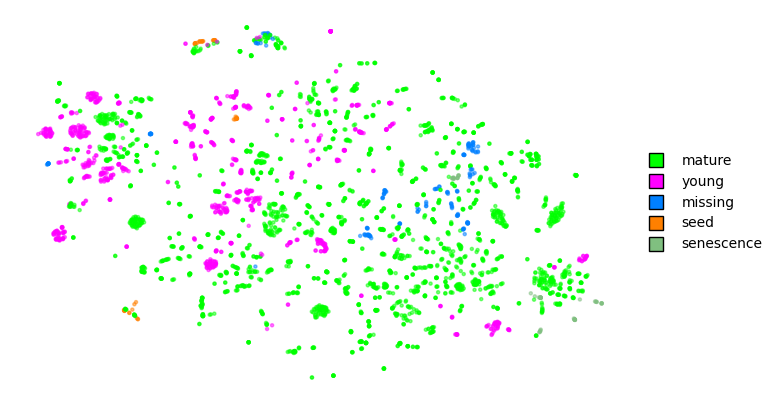

In [38]:
figure, axis = matplotlib.pyplot.subplots(figsize = (8, 5))

data_tsne.plot_tsne(
	annotated = tsne_sample_annotated,
	x = 'TSNE',
	y = 'Age',
	axis = axis,
	size = 5
)

Generated 9 colors using <distinctipy>


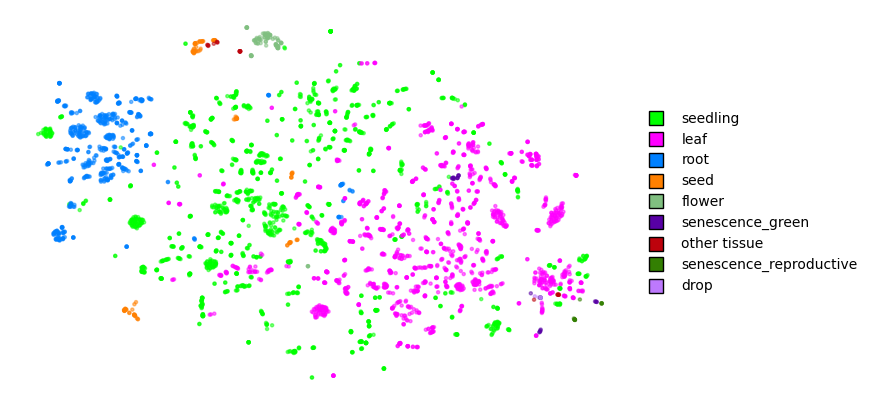

In [39]:
figure, axis = matplotlib.pyplot.subplots(figsize = (8, 5))

data_tsne.plot_tsne(
	annotated = tsne_sample_annotated,
	x = 'TSNE',
	y = 'Tissue',
	axis = axis,
	size = 5
)

Generated 20 colors using <distinctipy>


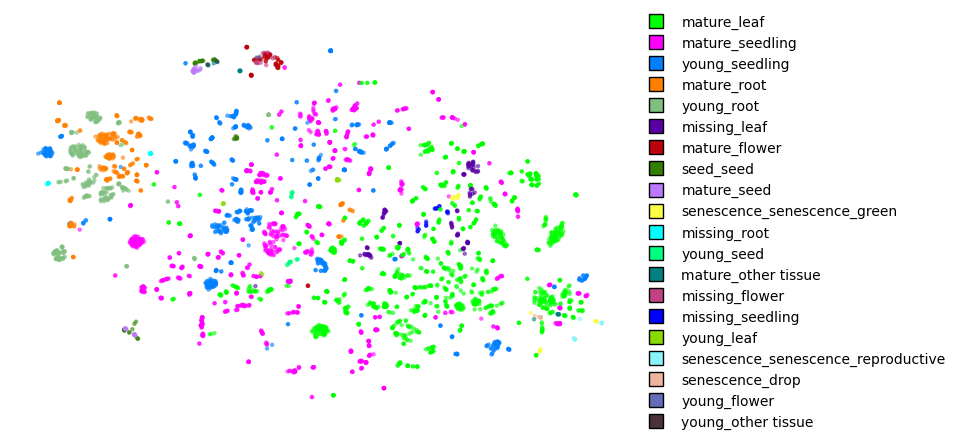

In [40]:
figure, axis = matplotlib.pyplot.subplots(figsize = (8, 5))

data_tsne.plot_tsne(
	annotated = tsne_sample_annotated,
	x = 'TSNE',
	y = 'Group',
	axis = axis,
	size = 5
)

Generated 8 colors using <distinctipy>


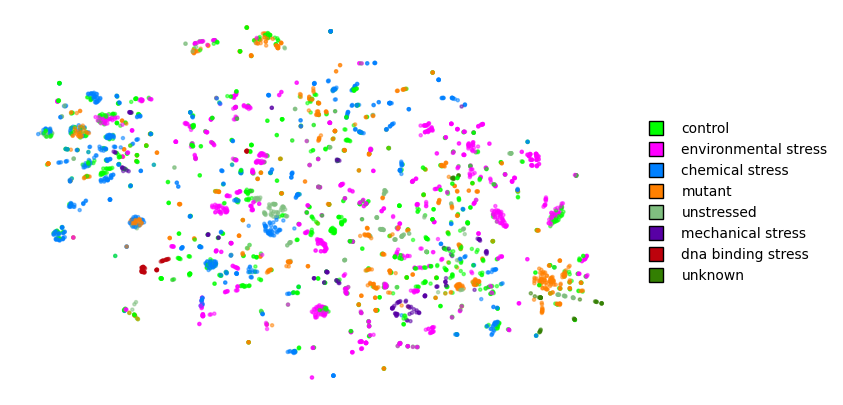

In [41]:
figure, axis = matplotlib.pyplot.subplots(figsize = (8, 5))

data_tsne.plot_tsne(
	annotated = tsne_sample_annotated,
	x = 'TSNE',
	y = 'Perturbation',
	axis = axis,
	size = 5
)

Generated 2 colors using <distinctipy>


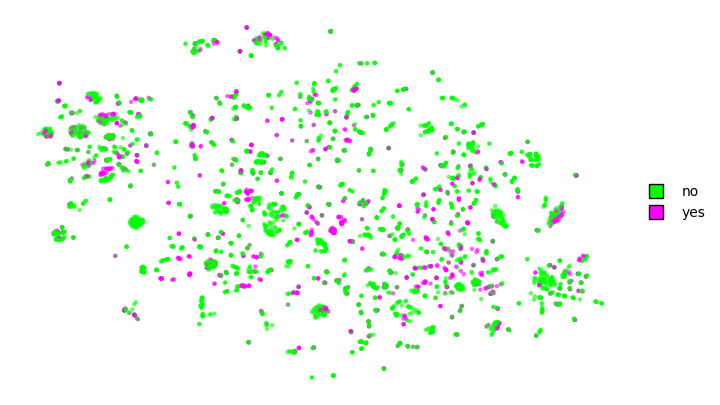

In [42]:
figure, axis = matplotlib.pyplot.subplots(figsize = (8, 5))

data_tsne.plot_tsne(
	annotated = tsne_sample_annotated,
	x = 'TSNE',
	y = 'Control',
	axis = axis,
	size = 5
)